In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk 
import pandas as pd
import matplotlib
ind = erk.get_ind_returns()
er = erk.annualized_rets(ind['1996': '2000'], 12)
cov = ind['1996':'2000'].cov()

In [2]:
def optimal_weights(n_points, er, cov):
    '''
    -> list of weights to run the optimizer on to minimize the volatility
    '''
    target_rs = np.linspace(er.min(),er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights

def plot_ef(n_points, er, cov, style = '.-'):
    '''
    Plots the N - Asset Efficient Frontier
    '''
    import numpy as np
    weights = optimal_weights(n_points, er, cov)
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        'Returns': rets,
        'Volatility': vols
    })
    return ef.plot.line(x = 'Volatility', y = 'Returns', style = style)

In [3]:
from scipy.optimize import minimize

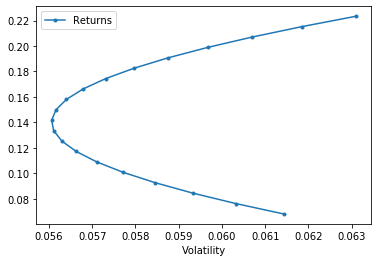

In [4]:
l = ['Games', 'Fin']
erk.plot_ef2(20, er[l], cov.loc[l,l])

In [5]:
import numpy as np

def minimize_vol(target_return, er, cov):
    '''
    Target_return -> W
    '''
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n
    return_is_target = {
        'type': 'eq',
        'args': (er,),
        'fun': lambda weights, er: target_return - erk.portfolio_return(weights, er)
    }
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    results = minimize(erk.portfolio_vol, init_guess, args = (cov,), method = 'SLSQP', constraints = (return_is_target, weights_sum_to_1),bounds = bounds
    )
    return results.x


In [6]:
l

['Games', 'Fin']

In [7]:
w15 = erk.minimize_vol(0.15, er[l], cov.loc[l,l])
vol15 = erk.portfolio_vol(w15, cov.loc[l,l])
vol15

0.056163669406706564

In [8]:
w15

array([0.47287631, 0.52712369])

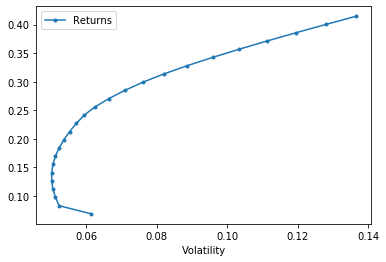

In [9]:
l = ['Smoke', 'Fin', 'Games', 'Coal']
erk.plot_ef(25,er[l], cov.loc[l,l])